# 3.1 MNIST

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784', version=1, cache=True)
# mnist

# def sort_by_target(mnist):
#     reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
#     reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
#     mnist.data[:60000] = mnist.data[reorder_train]
#     mnist.target[:60000] = mnist.target[reorder_train]
#     mnist.data[60000:] = mnist.data[reorder_test + 60000]
#     mnist.target[60000:] = mnist.target[reorder_test + 60000]

# try:
#     from sklearn.datasets import fetch_openml
#     mnist = fetch_openml('mnist_784', version=1, cache=True)
#     mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
#     sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
# except ImportError:
#     from sklearn.datasets import fetch_mldata
#     mnist = fetch_mldata('MNIST original')

def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [3]:
mnist.data.shape

(70000, 784)

In [4]:
# import numpy as np

# X, y = mnist['data'].to_numpy(), mnist['target'].astype(np.int8)
# X, y = mnist['data'], mnist['target']
# X.shape
# 28*28 픽셀이기 때문에 각 이미지에는 784개의 특성이 있음
# 개개의 특성은 0(흰색)부터 255(검은색)까지의 픽셀 강도를 나타냄

X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

Saving figure some_digit_plot


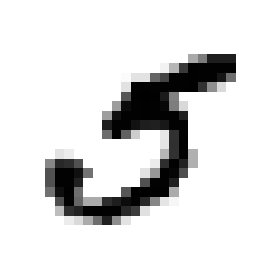

In [6]:
# %matplotlib inline
# import matplotlib as mpl
# import matplotlib.pyplot as plt

# some_digit = X.to_numpy()[36000]
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation='nearest')
plt.axis('off')
save_fig('some_digit_plot')
plt.show()

In [7]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [8]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


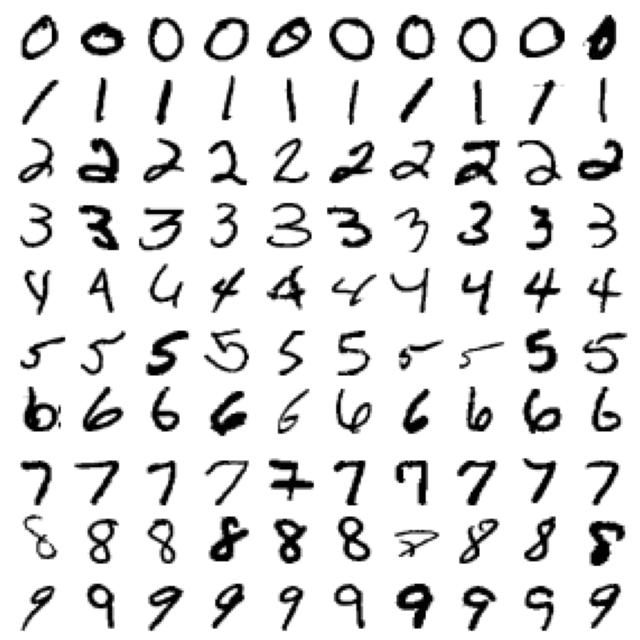

In [9]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [10]:
y[36000]

5

In [11]:
# 데이터 조사 전 항상 테스트 셋을 떼어놓아야 함!!

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [12]:
# training set 섞기
# 시계열 데이터를 다룰 때는 섞는 것이 좋지 않음

import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# 3.2 이진 분류기 훈련

In [13]:
# 문제를 단순화해서 하나의 숫자 5만 식별해보기
# 아래 '5-감지기'는 '5', '5 아님' 두 개의 클래스를 구분할 수 있는 이진 분류기(binary classifier)의 한 예
# 분류 작업을 위해 타깃 벡터 만들기

y_train_5 = (y_train == 5) # 5는 True, 다른 숫자는 모두 False
y_test_5 = (y_test == 5)

In [14]:
# 이제 분류 모델 하나를 선택해서 훈련시키기
# 확률적 경사 하강법(SGD, Stochastic Gradient Descent)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(max_iter=5, random_state=42, tol=-inf)

In [15]:
sgd_clf.predict([some_digit])

array([ True])

# 3.3 성능 측정

# 3.3.1 교차 검증을 사용한 정확도 측정

In [16]:
# 교차 검증 구현
# 사이킷런이 제공하는 기능보다 교차 검증 과정을 더 많이 제어해야 할 때 직접 구현

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9686
0.96205
0.9668


In [17]:
# 폴드가 3개인 K-겹 교차 검증으로 평가

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.96225, 0.9645 , 0.94765])

In [18]:
# 이미지를 '5 아님' 클래스로 분류하는 더미 분류기를 만들어서 비교해보기

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [19]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

# 데이터에 '5'보다 '5 아님'이 월등히 많음 -> 다 '5 아님'이라고 예측하면 맞출 확률이 매우 높아짐

# 이 예제는 정확도를 분류기의 성능 측정 지표로 선호하지 않는 이유를 보여줌!!
# 특히 불균형한 데이터셋을 다룰 때(어떤 클래스가 다른 것보다 월등히 많은 경우) 더욱 그러함

array([0.909  , 0.90715, 0.9128 ])

# 3.3.2 오차 행렬

In [20]:
# 분류기의 성능을 평가하는 더 좋은 방법: 오차 행렬(confusion matrix)
# 클래스 A의 샘플이 클래스 B로 잘못 분류된 횟수를 세는 것
# 예를 들어 숫자 5의 이미지를 3으로 잘못 분류한 횟수를 알고 싶다면 오차 행렬의 5행 3열을 보면 됨

# 오차 행렬을 만들기 위해선 실제 타깃과 비교할 수 있는 예측값을 먼저 만들어야겠지

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
# cross_val_score과 마찬가지로 K-겹 교차 검증을 수행하지만 평가 점수는 반환하지 않고 각 테스트 폴드에서 얻은 예측을 반환함

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)
# 행: 실제 클래스, 열: 예측한 클래스
# 1행 1열(53997): '5 아님'을 '5 아님'이라고 예측 (진짜 음성 true negative)
# 1행 2열(582): '5 아님'을 '5'라고 예측 (거짓 양성 false positive) - 1종 오류
# 2행 1열(1799): '5'를 '5 아님'이라고 예측 (거짓 음성 false negative) - 2종 오류
# 2행 2열(3622): '5'를 '5'라고 예측 (진짜 양성 true positive)

array([[53417,  1162],
       [ 1350,  4071]])

# 3.3.3 정밀도와 재현율

In [22]:
# 분류기(Classfier)의 정밀도(precision): 양성 예측의 정확도(TP / (TP+FP))
# 확실한 양성 샘플 하나만 예측하면 간단히 완벽한 정밀도를 얻을 수 있음
# 하지만 이 경우에는 다른 모든 양성 샘플을 무시하기 때문에 그리 유용하지 않음('5'를 제외한 나머지 수의 양성 샘플은 무시될테니)

# 재현율(recall, 민감도 sensitivity, 진짜 양성 비율 true positive rate(TPR)): 분류기가 정확하게 감지한 양성 샘플의 비율(TP / (TP+FN))

# 정밀도: TP/P, 재현율: TP/T

In [23]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.7779476399770686

In [24]:
recall_score(y_train_5, y_train_pred)

0.7509684560044272

In [25]:
# 위에서 만든 '5-감지기'는 생각보다 구리구나
# 5로 판별된 이미지 중 86% 정확함
# 실제 5 중에서 66% 감지했음

In [26]:
# 정밀도와 재현율을 F1 점수(F1 score)라고 하는 하나의 숫자로 만들면 편리할 때가 많음(특히 두 분류기를 비교할 때)
# F1 점수는 정밀도와 재현율의 조화 평균(harmonic mean)임 -> 정밀도와 재현율이 비슷하면 F1 점수가 높겠지
# 조화평균: 역수의 산술평균의 역수
# F1 = 2 / ((1/정말도) + (1/재현율))

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7642200112633752

상황에 따라 정밀도가 중요할 수도 있고 재현율이 중요할 수도 있음

어린아이에게 안전한 동영상만 보여주기 -> 정밀도가 높음: 안전하다고 예측한 동영상중에 실제로 안전한 동영상이 많음 -> 실제로는 안전한데 위험하다고 예측한 동영상이 있을지라도 위험한 동영상은 잘 안나오겠지 -> 좋음

감시 카메라를 통해 좀도둑 잡아내기 -> 재현율이 높음: 잡은 사람 대부분이 진짜 좀도둑이 많음 -> 좀도둑이라고 예측한 사람 중 좀도둑의 비율이 낮아도 대부분의 좀도둑을 잡을 수 있겠지 -> 좋음

FP가 커지면 FN은 작아지고 반대도 마찬가지 -> 정밀도가 작아지면 재현율이 커짐 -> '정밀도/재현율 트레이드오프'

In [27]:
print('                       예측')
print('                false      true')
print('실제     false    TN         FP')
print('        true     FN         TP')

                       예측
                false      true
실제     false    TN         FP
        true     FN         TP


# 정밀도/재현율 트레이드오프

In [28]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([150526.40944343])

In [29]:
threshold = 0 # 임곗값
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [30]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [31]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method='decision_function')

In [32]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving figure precision_recall_vs_threshold_plot


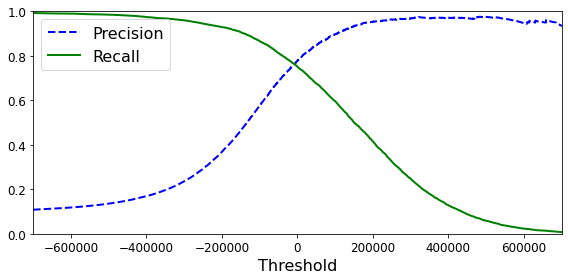

In [33]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

# 정밀도 곡선 울퉁불퉁함 -> 임곗값을 올리더라도 정밀도가 가끔 낮아질 때가 있기 때문

Saving figure precision_vs_recall_plot


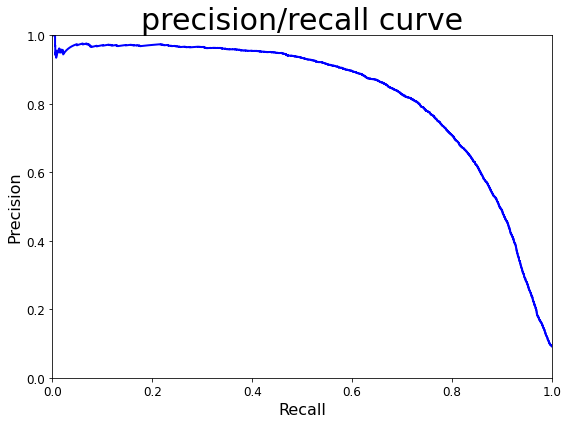

In [34]:
# 재현율에 대한 정밀도 곡선 (정밀도/재현율 곡선)
# 재현율 80% 근처에서 정밀도가 급격히 감소함 -> 이 하강점 직전을 정밀도/재현율 트레이드오프로 선택하는 것이 좋음
# 물론 이런 선택은 프로젝트에 따라 달라짐!!

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.title('precision/recall curve', fontsize=30)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()

In [35]:
(y_train_pred == (y_scores > 0)).all()

True

In [36]:
# 만약 정밀도 90%가 목표라면 임곗값이 약 70000정도임 -> 분류기의 predict()를 호출하지 않아도 다음 코드로 확인 가능
y_train_pred_90 = (y_scores > 70000)

In [37]:
precision_score(y_train_5, y_train_pred_90)
# 정밀도 90%에 거의 근접한 분류기 완성!!

0.8712083540527101

In [38]:
recall_score(y_train_5, y_train_pred_90)

0.6463752075262866

만약 누군가가 '99% 정밀도를 달성하자'라고 말한다면 반드시 '재현율 얼마에서?'라고 물어봐야함!!

# 3.3.5 ROC 곡선

수신기 조작 특성(receiver operating characteristic, ROC) 곡선: 이진 분류에 널리 사용되는 도구

위의 정밀도/재현율 곡선과 매우 비슷하지만, ROC 곡선은 정밀도에 대한 재현율 곡선이 아님!!

-> 거짓 양성 비율(false positive rate, FPR)에 대한 진짜 양성 비율(true positive rate, TPR, 재현율의 다른 이름)의 곡선임

FPR = 1 - 진짜 음성 비율(true negative rate, TNR, 특이도(specificity)) = 1 - 특이도

-> ROC 곡선은 민감도(재현율)에 대한 1 - 특이도 그래프

In [39]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot


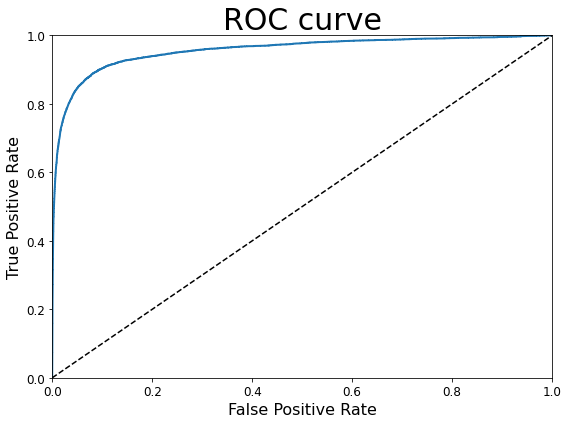

In [40]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=30)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

# 여기에도 트레이드오프가 있음 -> TPR이 높을수록 FPR이 늘어남
# 점선은 완전한 랜덤 분류기(우리는 랜덤이 아닌 원하는 것을 분류하는 분류기를 만들고 싶음) -> 점선과 멀수록 좋은 분류기
# 곡선 아래 면적이 1이면 완벽한 분류기, 0.5면 완전한 랜덤 분류기

In [41]:
# 곡선 아래 면적 계산하기
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9562435587387078

## ROC 곡선 vs 정밀도/재현율(PR) 곡선

### 일반적으로 양성 클래스(True)가 드물거나 거짓 음성(FN)보다 거짓 양성(FP)이 더 중요할 때 PR 곡선을 사용
### 그렇지 않으면 ROC 곡선 사용

In [42]:
# random forest classifier를 훈련시켜 SGD classifier의 AUC 점수를 비교

# 먼저 훈련 셋의 샘플에 대한 점수를 얻어야 함 -> 하지만 작동 방식이 다르기 때문에 random forest classifier에는 decision_function()이 없음
# 대신 predict_proba() 메서드가 잇음
# 사이킷런 분류기는 일반적으로 decision_function() 메서드나 predict_proba() 메시드 중 하나 또는 둘 모두를 가지고 있음
# predict_proba(): 샘플이 행, 클래스가 열이고 샘플이 주어진 클래스에 속할 확률을 담은 배열을 반환(예: 어떤 이미지가 5일 확률 70%)

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                   method='predict_proba')

In [43]:
# ROC 곡선을 그리기 위해선 확률이 아니라 점수가 필요 -> 양성 클래스의 확률을 점수로 사용

y_scores_forest = y_probas_forest[:, 1] # 양성 클래스에 대한 확률을 점수로 사용
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

Saving figure roc_curve_comparison_plot


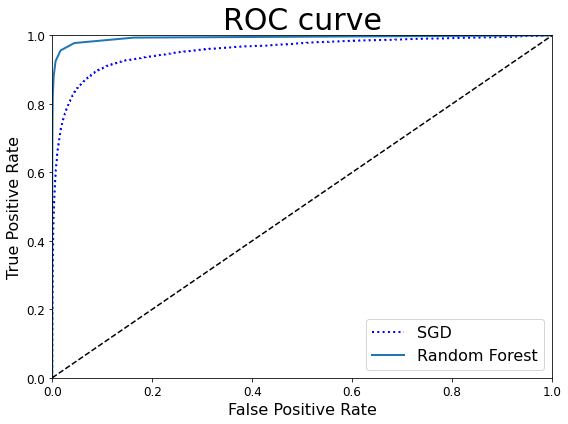

In [44]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [45]:
roc_auc_score(y_train_5, y_scores_forest)

0.9931243366003829

In [46]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9852973447443494

In [47]:
recall_score(y_train_5, y_train_pred_forest)

'''
지금까지 이진 분류기를 훈련시키는 방법과 작업에 맞는 적절한 지표 선택, 교차 검증을 사용한 평가, 요구사항에 맞는 정밀도/재현율 트레이드오프 선택,
ROC 곡선과 ROC AUC 점수를 사용한 여러 모델의 비교에 대해 배움, 다음에는 숫자 5 이상을 감지해보기
'''

'\n지금까지 이진 분류기를 훈련시키는 방법과 작업에 맞는 적절한 지표 선택, 교차 검증을 사용한 평가, 요구사항에 맞는 정밀도/재현율 트레이드오프 선택,\nROC 곡선과 ROC AUC 점수를 사용한 여러 모델의 비교에 대해 배움, 다음에는 숫자 5 이상을 감지해보기\n'

# 3.4 다중 분류(Multiclass classification)

In [48]:
# 이진 분류는 두 개의 클래스를 구별, 다중 분류기는 둘 이상의 클래스를 구별

# 예) 서포트 벡터 머신 분류기, 선형 분류기는 이진 분류만 가능, 랜덤 포레스트 분류기, 나이브 베이즈 분류기는 다중 분류기

# 이진 분류기를 여러 개 사용해 다중 클래스를 분류하는 기법도 많음
# 예) 숫자별 이진 분류기를 10개 훈련시켜 클래스가 10개인 숫자 이미지 분류 시스템을 만들 수 있음
# -> 이미지를 분류할 때 각 분류기의 결정 점수중에서 가장 높은 것을 클래스로 선택하면 됨
# -> 일대다 (one-versus-all, one-versus-the-rest)(OvA) 전략
# 예) 0과 1 구별, 0과 2 구별, ... 등과 같이 각 숫자의 조합마다 이진 분류기를 훈련
# -> 일대일(one-versus-one)(OvO) 전략
# -> 클래스가 N개라면 N * (N-1) / 2개의 분류기가 필요하겠지 -> 장점은 각 분류기의 훈련에 전체 훈련 셋 중 구별할 두 클래스의 샘플만 필요하다는 것

# 서포트 벡터 머신 같은 일부 알고리즘은 훈련 셋의 크기에 민감 -> OvO 선호 -> 하지만 대부분의 이진 분류 알고리즘에서는 OvA를 선호

# 다중 클래스 분류 작업에 이진 분류 알고리즘을 선택하면 사이킷런이 자동으로 감지해 OvA(SVM은 OvO)를 적용

sgd_clf.fit(X_train, y_train) # y_train_5가 아니라 y_train 사용!! -> 그래도 5를 맞췄네!
sgd_clf.predict([some_digit])

array([5], dtype=int8)

In [49]:
# 위 코드는 내부에서 사이킷런이 10개의 이진 분류기를 훈련시키고 각각의 결정 점수를 얻어 점수가 가장 높은 클래스를 선택한 것임
# 예) 숫자 1 이미지를 만남 -> 0 이진 분류기, 1 이진 분류기, ... , 9 이진 분류기 모두가 이 이미지를 확인 -> 1일때 점수가 제일 높음 -> 1이라고 분류
# 아래 점수는 숫자 5 이미지를 만났을 때 각 이진 분류기의 점수

some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-152619.46799791, -441052.22074349, -249930.3138537 ,
        -237258.35168498, -447251.81933158,  120565.05820991,
        -834139.15404835, -188142.48490477, -555223.79499145,
        -536978.92518594]])

In [50]:
# np.argmax(): some_digit_scores에서 최댓값에 해당하는 애의 index를 구해줌 (최솟값은 argmin이겠지)
np.argmax(some_digit_scores)

5

In [51]:
# 타깃 클래스의 리스트를 값으로 정렬하여 저장 (타깃 클래스에 어떤 애들이 있는지)
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [52]:
sgd_clf.classes_[5]

5

In [53]:
# 사이킷런에서 OvO나 OvA를 사용하도록 강제하려면 OneVsOneClassifier나 OneVsRestClassifier를 사용하면 됨

# 아래 코드는 SGDClassifier 기반으로 OvO 전략을 사용하는 다중 분류기
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5], dtype=int8)

In [54]:
len(ovo_clf.estimators_) # 10*9/2

45

In [55]:
# 랜덤 포레스트 분류기는 직접 샘플을 다중 클래스로 분류하는 것이 가능 -> 별도의 OvA나 OvO를 적용할 필요가 없음

forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5], dtype=int8)

In [56]:
forest_clf.predict_proba([some_digit]) # 각 클래스별 확률

array([[0.1, 0. , 0. , 0.1, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [57]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8618, 0.8675, 0.8389])

In [58]:
# 입력 스케일 조정으로 성능 높이기

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.9091 , 0.90955, 0.9062 ])

# 3.5 에러 분석

In [59]:
'''
실제 프로젝트라면
1. 데이터 준비 단계에서 가능한 선택사항 탐색
2. 여러 모델을 시도
3. 가장 좋은 몇 개를 골라 GridSearchCV를 사용해 하이퍼파라미터를 세밀하게 튜닝
4. 가능한 한 자동화
'''

# 가능성이 높은 모델을 찾았다고 가정하고 성능 향상시킬 방법중 하나 -> 에러의 종류 분석

# 오차 행렬 살펴보기
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred) # y_train: 행, y_train_pred: 열
conf_mx
# conf_mx[2][3] = 103 -> 2를 3이라고 예측함

array([[5728,    3,   18,   10,   11,   48,   54,   10,   38,    3],
       [   2, 6472,   43,   27,    6,   41,    6,    9,  124,   12],
       [  59,   39, 5300,  103,   96,   24,   99,   57,  167,   14],
       [  60,   42,  133, 5357,    4,  213,   35,   52,  135,  100],
       [  14,   28,   33,    9, 5366,    8,   56,   33,   88,  207],
       [  68,   49,   30,  197,   76, 4566,  118,   33,  190,   94],
       [  35,   28,   31,    1,   47,   86, 5639,    9,   42,    0],
       [  22,   20,   70,   29,   65,   11,    6, 5789,   18,  235],
       [  55,  158,   63,  157,   11,  155,   61,   24, 5022,  145],
       [  38,   37,   30,   85,  185,   24,    2,  216,   74, 5258]])

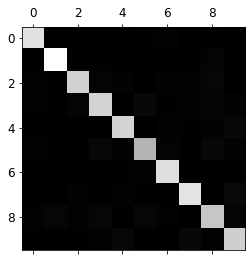

In [61]:
# 오차 행렬은 matplotlib의 matshow() 함수를 사용해 이미지로 표현하면 보기 편리할 때가 많음 (큰 값일수록 흰색)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()
# 대각선은 잘 예측한 애들
# 5,5가 다른 칸보다 조금 어두움 -> 숫자 5 자체가 적을 수도 있고 숫자 5를 다른 숫자만큼 잘 분류하지 못했을 수도 있음 -> 둘 다 확인해 봐야 함

In [62]:
row_sums = conf_mx.sum(axis=1, keepdims=True) # 각 열의 합 (예측한 클래스의 총 개수)
norm_conf_mx = conf_mx / row_sums

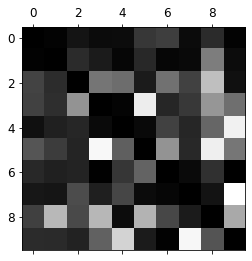

In [66]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

# 8열과 9열에 밝은 칸이 많음 -> 8과 9로 잘못 예측된 애들이 많다.
# 5가 8로 잘못 분류된 경우가 8이 5로 잘못 분류된 경우보다 많다.

Saving figure error_analysis_digits_plot


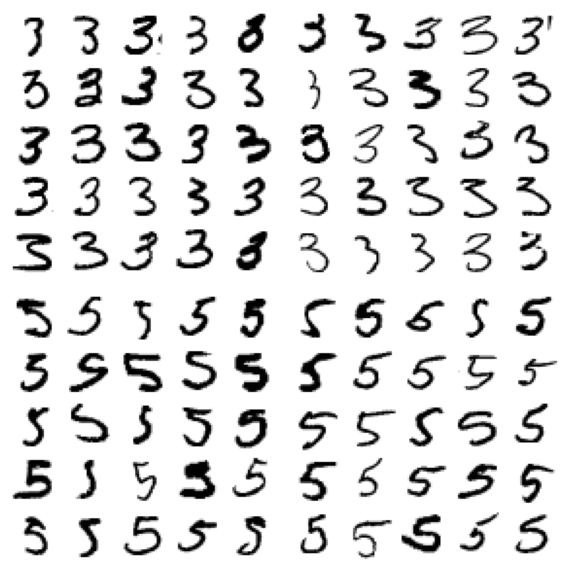

In [69]:
# 오차 행렬을 통해 성능 향상 방안에 대한 통찰을 얻을 수 있음
'''
예) 3과 5가 서로 혼돈되는 것을 보완하고 8과 9를 더 잘 분류할 수 있도록 개선할 필요가 있어 보임
-> 훈련 데이터를 더 모으기
-> 분류기에 도움이 될 만한 특성을 더 찾기 (예: 숫자에 동그라미가 몇개인지? 8은 2개, 9는 1개, ...)
'''

cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

# 왼쪽의 5*5 블록 두 개: 3으로 분류된 이미지
# 오른쪽의 5*5 블록 두 개: 5로 분류된 이미지

'''
사람이 보기엔 분류기가 실수한 이유를 이해하기 어려움
-> 원인은 선형 모델인 SGDClassifier를 사용했기 때문임
-> 선형 분류기는 클래스마다 픽셀에 가중치를 할당하고 새로운 이미지에 대해 단순히 픽셀 강도의 가중치 합을 클래스의 점수로 계산함
-> 3과 5는 몇 개의 픽셀만 다르기 때문에 모델이 쉽게 혼동하게 됨

3과 5의 가장 큰 차이는 위쪽 선과 아래쪽 호를 이어주는 작은 직선의 위치임
-> 3을 쓸 때 연결 부위가 조금 왼쪽으로 치우치면 분류기가 5로 분류해버림, 반대도 마찬가지임
-> 다시 말해 분류기는 이미지의 위치나 회전 방향에 매우 민감함

-> 이미지를 중앙에 위치시키고 회전되어 있지 않도록 전처리하면 3과 5를 좀 더 잘 구분하겠지
'''

# 3.6 다중 레이블 분류

In [70]:
# 지금까지는 각 샘플이 하나의 클래스에만 할당됨

# 분류기가 샘플마다 여러 개의 클래스를 출력해야 한다면?
# 예: 분류기가 앨리스, 밥, 찰리의 얼굴을 인식하도록 훈련됨 -> 사진에 앨리스와 찰리가 있다면 [1, 0, 1]을 출력해야함 (앨리스 있음, 밥 없음, 찰리 있음)
# 이렇게 여러 개의 이진 레이블을 출력해야 하는 분류 시스템을 '다중 레이블 분류(multilabel classification)' 시스템이라고 함

from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [71]:
knn_clf.predict([some_digit]) # 5는 7이상이 아니고(False), 홀수(True) -> 잘 예측됨!

array([[False,  True]])

In [74]:
# 다중 레이블 분류기를 평가하는 방법의 예시: 각 레이블의 F1 점수를 구하고 간단하게 평균 점수 계산하기
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

# 이 코드는 모든 레이블의 가중치가 같다고 가정한 것
# 앨리스 사진이 밥이나 찰리보다 훨씬 많다면 앨리스 사진에 대한 분류기의 점수가 더 높은 가중치를 둘 것
# 간단한 예) 레이블에 클래스의 지지도(support, 타깃 레이블에 속한 샘플 수)를 가중치로 주는 것 -> average='weighted'로 하면 됨

0.97709078477525

# 3.7 다중 출력 분류

In [86]:
# 다중 출력 다중 클래스 분류(multioutput-multiclass classification, 간단히 다중 출력 분류 multioutput classification)
# 다중 레이블 분류에서 한 레이블이 다중 클래스가 될 수 있도록 일반화한 것 (값을 두 개 이상 가질 수 있음)

# 이미지에서 노이즈를 제거하는 시스템을 만들어보기

noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

Saving figure noisy_digit_example_plot


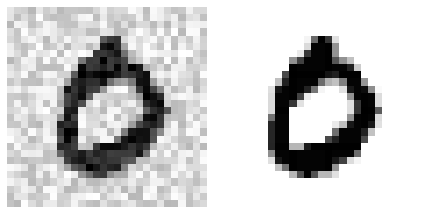

In [87]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig('noisy_digit_example_plot')
plt.show()

Saving figure cleaned_digit_example_plot


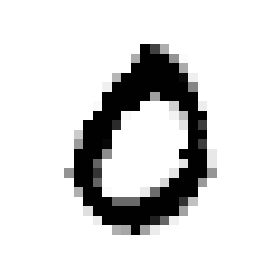

In [85]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
save_fig('cleaned_digit_example_plot')